# TWITTER SENTIMENT ANALYSIS

### IMPORTING LIBRARIES

In [1]:
import pandas as pd

### LOAD AND PREVIEW DATASET

In [2]:
df = pd.read_csv('twitter_dataset.csv')
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Tweet_ID   10000 non-null  int64 
 1   Username   10000 non-null  object
 2   Text       10000 non-null  object
 3   Retweets   10000 non-null  int64 
 4   Likes      10000 non-null  int64 
 5   Timestamp  10000 non-null  object
dtypes: int64(3), object(3)
memory usage: 468.9+ KB
None
   Tweet_ID        Username  \
0         1         julie81   
1         2   richardhester   
2         3  williamsjoseph   
3         4     danielsmary   
4         5      carlwarren   

                                                Text  Retweets  Likes  \
0  Party least receive say or single. Prevent pre...         2     25   
1  Hotel still Congress may member staff. Media d...        35     29   
2  Nice be her debate industry that year. Film wh...        51     25   
3  Laugh explain situation career occur serio

### Convert Timestamp to datetime format

In [3]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

### Function to clean text by removing URLs, mentions, hashtags, and special characters

In [4]:
import re

In [5]:
def clean_text(text):
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'@\w+', '', text)    # Remove mentions
    text = re.sub(r'#\w+', '', text)    # Remove hashtags
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special characters and numbers
    text = text.lower().strip()  # Convert to lowercase and strip whitespace
    return text

### Applying the cleaning function to the Text column

In [6]:
df['Cleaned_Text'] = df['Text'].apply(clean_text)

### Checking the cleaned data

In [7]:
df[['Text', 'Cleaned_Text', 'Timestamp']].head()

,Text,Cleaned_Text,Timestamp
0,Party least receive say or single. Prevent pre...,party least receive say or single prevent prev...,2023-01-30 11:00:51
1,Hotel still Congress may member staff. Media d...,hotel still congress may member staff media dr...,2023-01-02 22:45:58
2,Nice be her debate industry that year. Film wh...,nice be her debate industry that year film whe...,2023-01-18 11:25:19
3,Laugh explain situation career occur serious. ...,laugh explain situation career occur serious f...,2023-04-10 22:06:29
4,Involve sense former often approach government...,involve sense former often approach government...,2023-01-24 07:12:21


In [8]:
!pip install textblob
from textblob import TextBlob

### Function to compute sentiment polarity

In [9]:
def get_sentiment_polarity(text):
    return TextBlob(text).sentiment.polarity

### Applying sentiment analysis to the Cleaned_Text column

In [10]:
df['Sentiment_Polarity'] = df['Cleaned_Text'].apply(get_sentiment_polarity)

### Categorize sentiment as Positive, Neutral, or Negative based on polarity score

In [11]:
def categorize_sentiment(polarity):
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

df['Sentiment_Category'] = df['Sentiment_Polarity'].apply(categorize_sentiment)

### Displaying the results

In [12]:
df[['Cleaned_Text', 'Sentiment_Polarity', 'Sentiment_Category']].head()

,Cleaned_Text,Sentiment_Polarity,Sentiment_Category
0,party least receive say or single prevent prev...,0.115714,Positive
1,hotel still congress may member staff media dr...,0.308333,Positive
2,nice be her debate industry that year film whe...,0.220000,Positive
3,laugh explain situation career occur serious f...,0.054762,Positive
4,involve sense former often approach government...,0.033333,Positive


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

### Count the occurrences of each sentiment category

In [14]:
sentiment_counts = df['Sentiment_Category'].value_counts()

### Plot the distribution of sentiment categories

C:\Users\User\AppData\Local\Temp\ipykernel_13424\641027253.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette={'red', 'blue', 'green'})


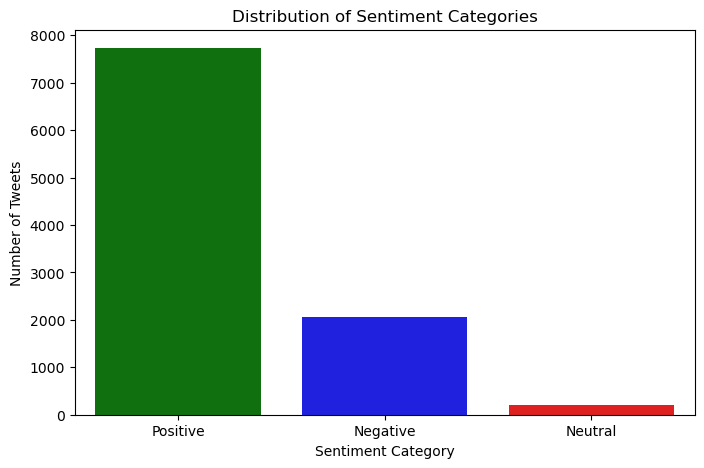

In [15]:
plt.figure(figsize=(8, 5))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette={'red', 'blue', 'green'})
plt.title('Distribution of Sentiment Categories')
plt.xlabel('Sentiment Category')
plt.ylabel('Number of Tweets')
plt.savefig('Distribution of Sentiment Categories.png')
plt.show()

### Grouping the data by date and sentiment category

In [16]:
df['Date'] = df['Timestamp'].dt.date
sentiment_trends = df.groupby(['Date', 'Sentiment_Category']).size().reset_index(name='Count')

### Plot sentiment trends

In [17]:
palette = {
    'Positive': 'darkgreen',  # Positive gets green
    'Negative': 'red',       # Negative gets red
    'Neutral': 'blue'   # Neutral gets blue
}

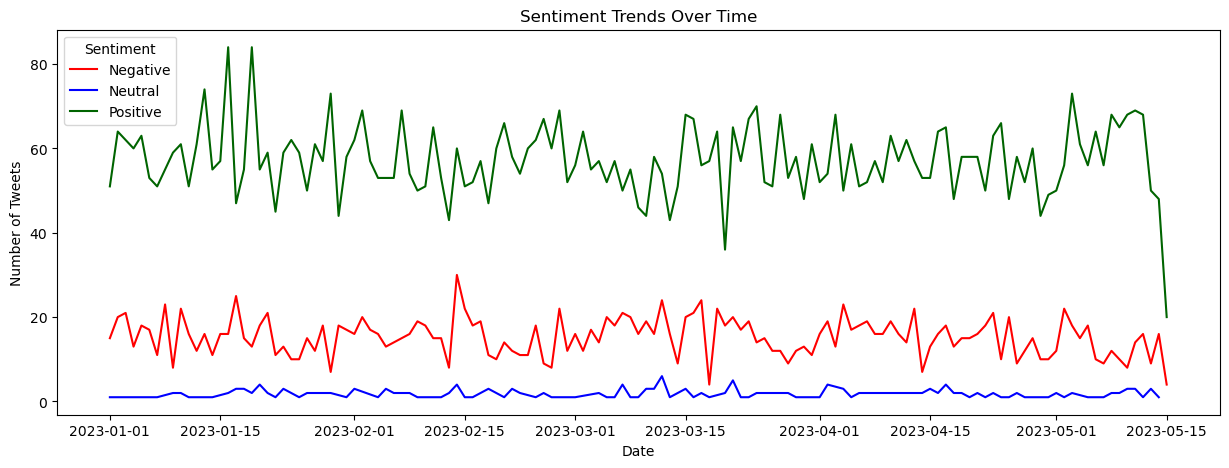

In [18]:
plt.figure(figsize=(15, 5))
sns.lineplot(data=sentiment_trends, x='Date', y='Count', hue='Sentiment_Category', palette=palette)
plt.title('Sentiment Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.legend(title='Sentiment')
plt.savefig('Sentiment Trends Over Time.png')
plt.show()

In [19]:
!pip install wordcloud
from wordcloud import WordCloud

### Function to create a word cloud for a specific sentiment

In [20]:
def create_wordcloud(sentiment):
    text = ' '.join(df[df['Sentiment_Category'] == sentiment]['Cleaned_Text'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {sentiment} Tweets')
    plt.savefig(f'Word Cloud for {sentiment} Tweets.png')
    plt.show()

### Generate word clouds

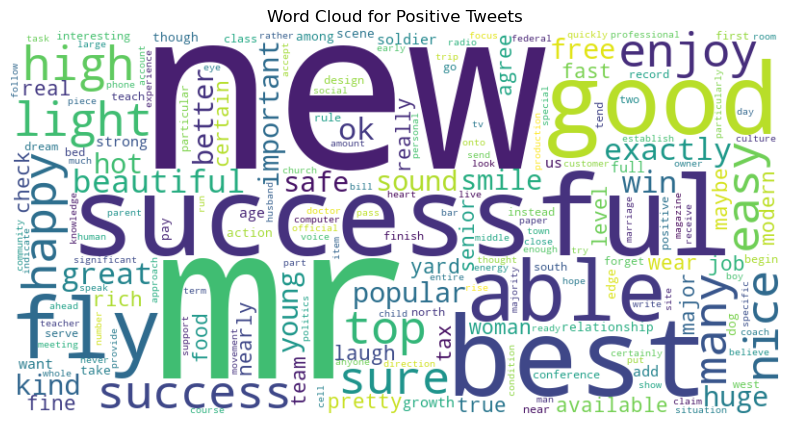

In [21]:
for sentiment in ['Positive']:
    create_wordcloud(sentiment)

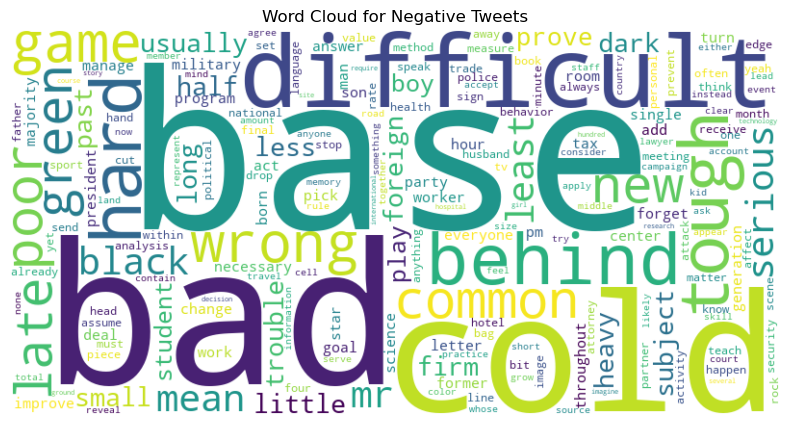

In [22]:
for sentiment in ['Negative']:
    create_wordcloud(sentiment)

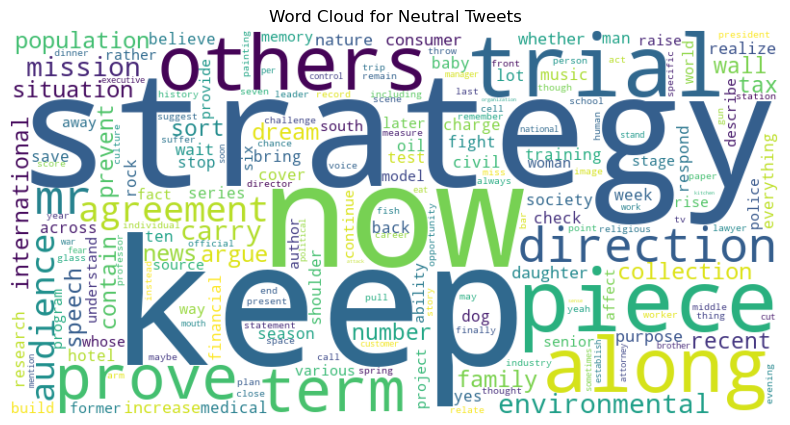

In [23]:
for sentiment in ['Neutral']:
    create_wordcloud(sentiment)

### Aggregate likes and retweets by username

In [24]:
top_users = df.groupby('Username')[['Likes', 'Retweets']].sum().sort_values(by='Likes', ascending=False).head(10)

### Plot top users

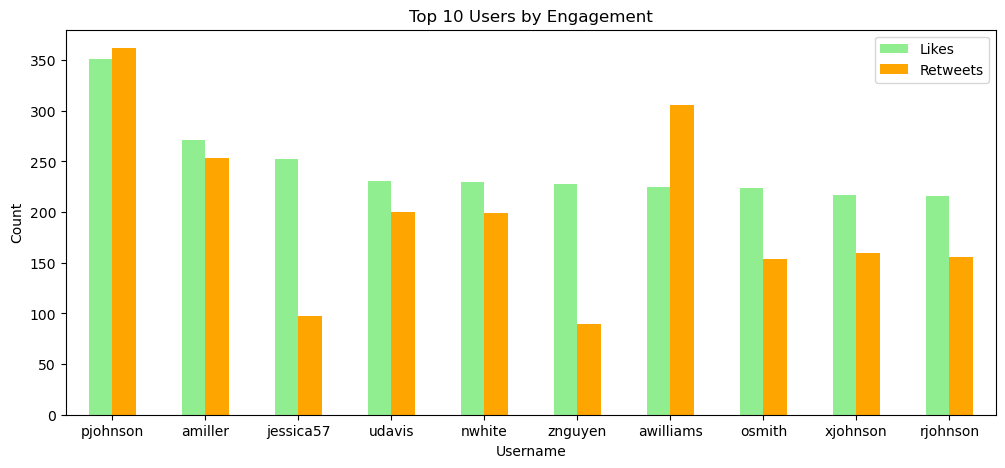

In [25]:
top_users.plot(kind='bar', figsize=(12, 5), color=['lightgreen', 'orange'])
plt.title('Top 10 Users by Engagement')
plt.xlabel('Username')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.savefig('Top 10 Users by Engagement.png')
plt.show()

### Boxplot of Likes and Retweets by Sentiment Category

C:\Users\User\AppData\Local\Temp\ipykernel_13424\631421549.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Sentiment_Category', y='Likes', palette=palette)


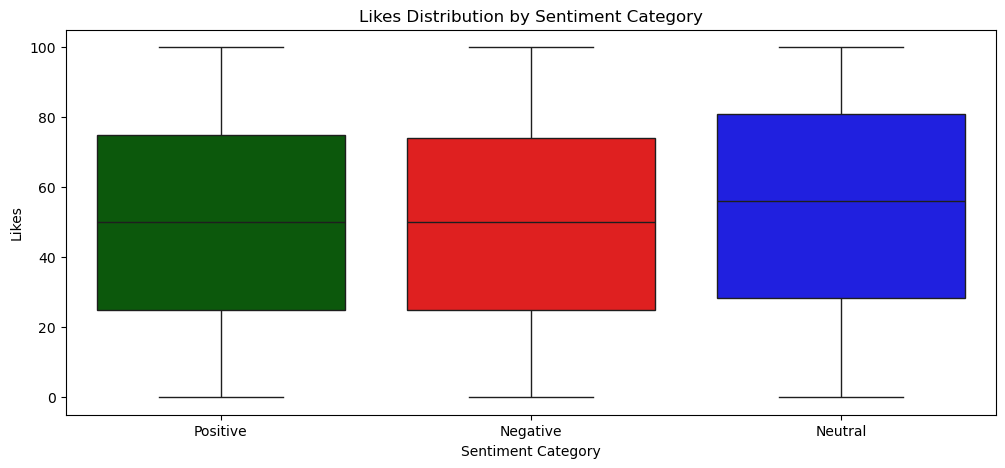

In [26]:
plt.figure(figsize=(12, 5))
sns.boxplot(data=df, x='Sentiment_Category', y='Likes', palette=palette)
plt.title('Likes Distribution by Sentiment Category')
plt.xlabel('Sentiment Category')
plt.ylabel('Likes')
plt.savefig('Likes Distribution by Sentiment Category.png')
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_13424\1465585623.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Sentiment_Category', y='Retweets', palette=palette)


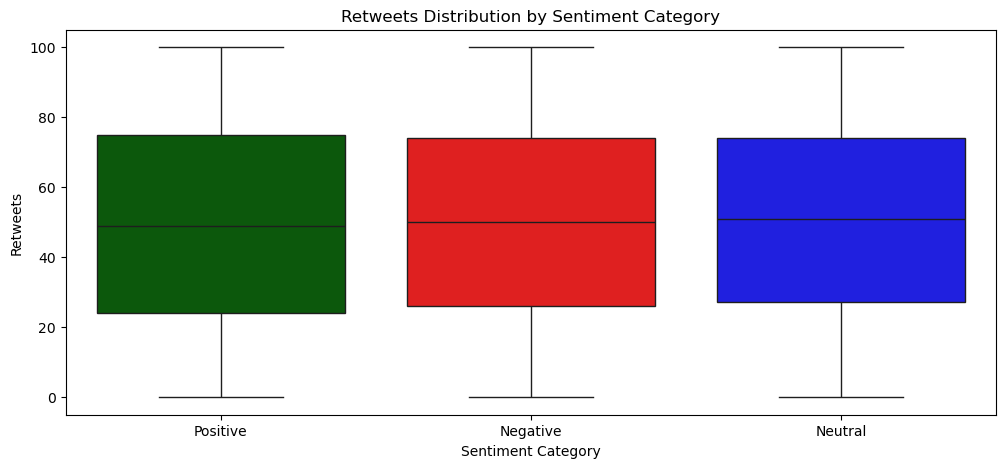

In [27]:
plt.figure(figsize=(12, 5))
sns.boxplot(data=df, x='Sentiment_Category', y='Retweets', palette=palette)
plt.title('Retweets Distribution by Sentiment Category')
plt.xlabel('Sentiment Category')
plt.ylabel('Retweets')
plt.savefig('Retweets Distribution by Sentiment Category.png')
plt.show()

### Aggregate likes and retweets by date

In [28]:
engagement_trends = df.groupby(df['Timestamp'].dt.date)[['Likes', 'Retweets']].sum().reset_index()

### Plot engagement trends

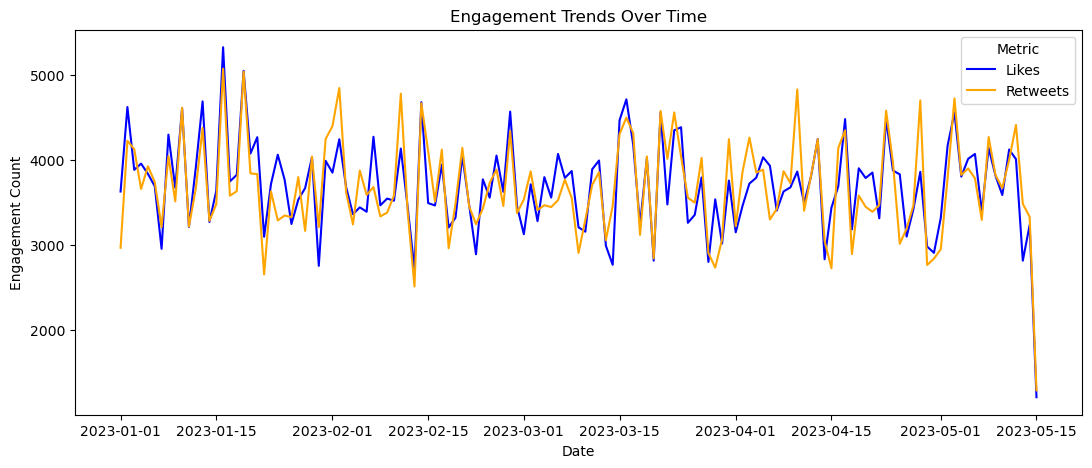

In [29]:
plt.figure(figsize=(13, 5))
sns.lineplot(data=engagement_trends, x='Timestamp', y='Likes', label='Likes', color='blue')
sns.lineplot(data=engagement_trends, x='Timestamp', y='Retweets', label='Retweets', color='orange')
plt.title('Engagement Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Engagement Count')
plt.legend(title='Metric')
plt.savefig('Engagement Trends Over Time.png')
plt.show()

### Importing Counter

In [30]:
from collections import Counter

### Combine all words in the Cleaned_Text column

In [31]:
all_words = ' '.join(df['Cleaned_Text']).split()

### Count word frequencies

In [32]:
word_counts = Counter(all_words).most_common(20)
words, counts = zip(*word_counts)

### Plot the most frequent words

C:\Users\User\AppData\Local\Temp\ipykernel_13424\97703641.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette='plasma')


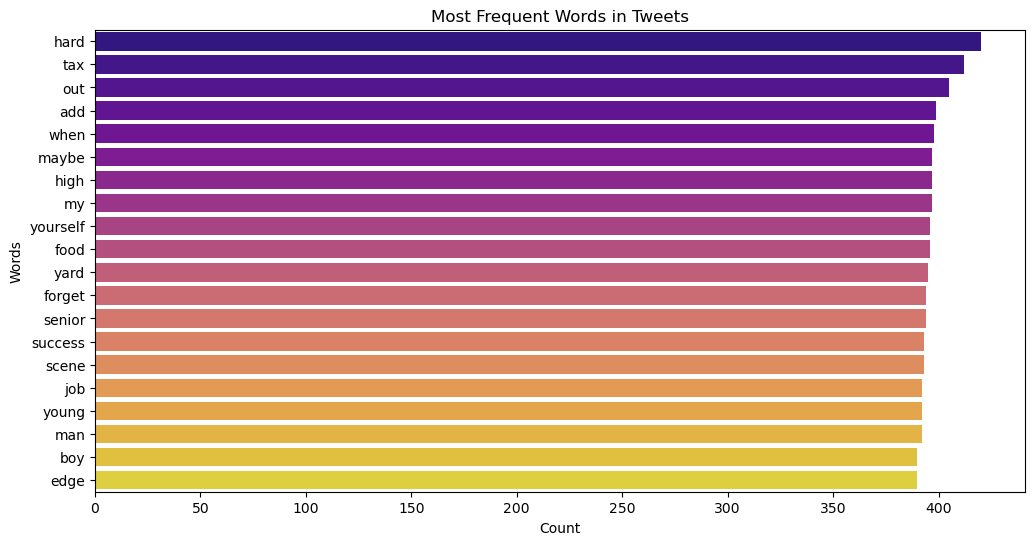

In [33]:
plt.figure(figsize=(12, 6))
sns.barplot(x=list(counts), y=list(words), palette='plasma')
plt.title('Most Frequent Words in Tweets')
plt.xlabel('Count')
plt.ylabel('Words')
plt.savefig('Most Frequent Words in Tweets.png')
plt.show()

### Scatter plot of Likes vs. Retweets

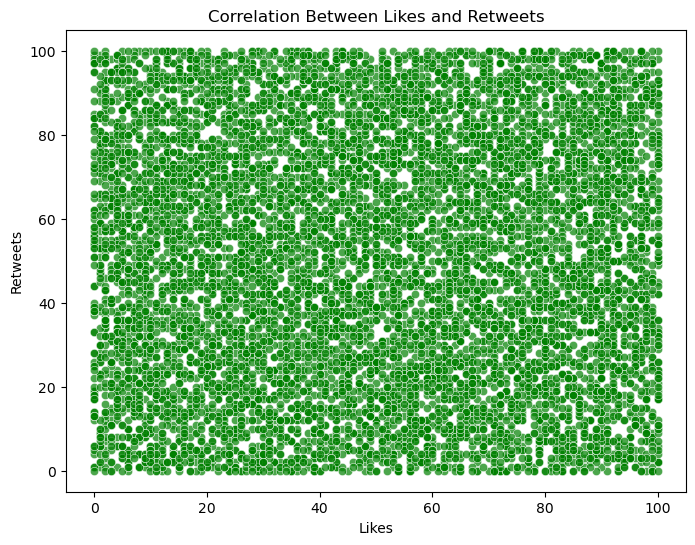

In [34]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Likes', y='Retweets', alpha=0.7, color='green')
plt.title('Correlation Between Likes and Retweets')
plt.xlabel('Likes')
plt.ylabel('Retweets')
plt.savefig('Correlation Between Likes and Retweets.png')
plt.show()

### Calculate correlation coefficient

In [35]:
correlation = df[['Likes', 'Retweets']].corr()
print("Correlation between Likes and Retweets:\n", correlation)

Correlation between Likes and Retweets:
              Likes  Retweets
Likes     1.000000  0.012798
Retweets  0.012798  1.000000


### Extract hour from the Timestamp

In [36]:
df['Hour'] = df['Timestamp'].dt.hour

### Plot the distribution of tweets by hour

C:\Users\User\AppData\Local\Temp\ipykernel_13424\4020942131.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Hour', data=df, palette='plasma')


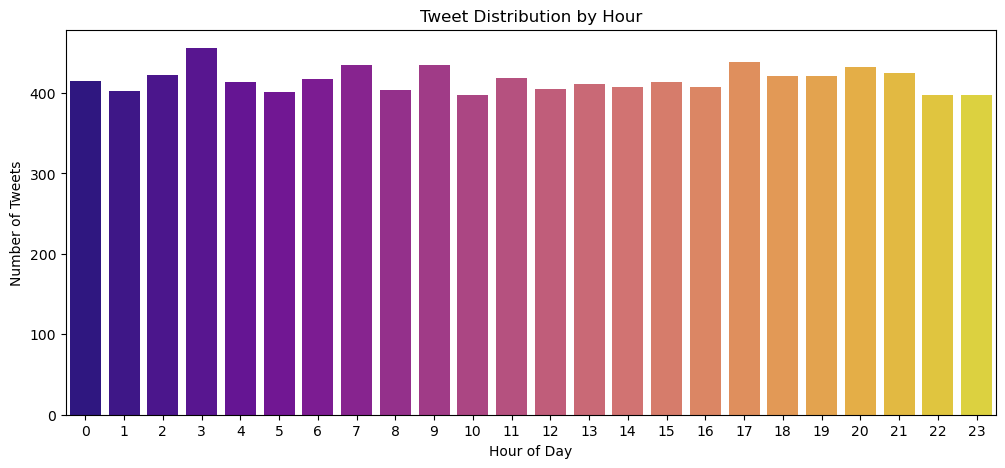

In [37]:
plt.figure(figsize=(12, 5))
sns.countplot(x='Hour', data=df, palette='plasma')
plt.title('Tweet Distribution by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Tweets')
plt.savefig('Tweet Distribution by Hour.png')
plt.show()

### Filter tweets containing a specific keyword

In [38]:
keyword = 'product'  # Example keyword
filtered_tweets = ' '.join(df[df['Cleaned_Text'].str.contains(keyword, na=False)]['Cleaned_Text'])

### Generate word cloud for the filtered tweets

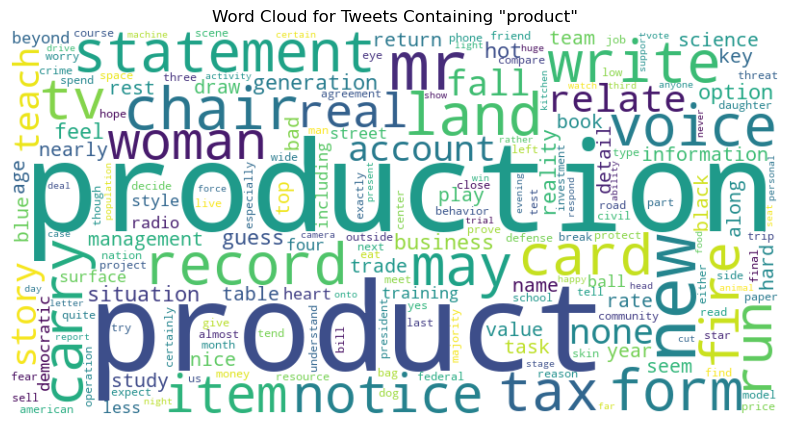

In [39]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(filtered_tweets)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title(f'Word Cloud for Tweets Containing "{keyword}"')
plt.savefig(f'Word Cloud for Tweets Containing {keyword}.png')
plt.show()